  0%|          | 0/10 [00:00<?, ?it/s]

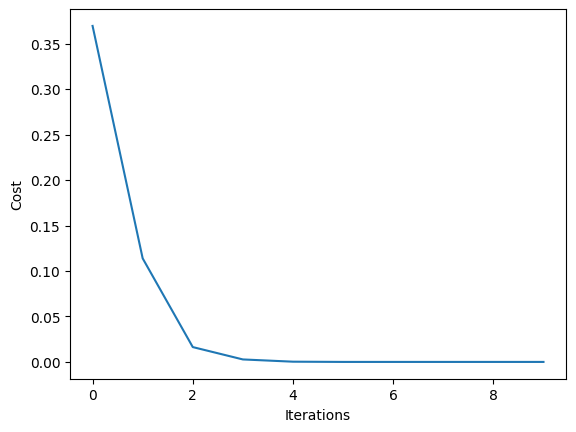

In [1]:
import numpy as np
from tqdm.notebook import tqdm

fn = lambda x: (0.2 * np.sqrt((x - 1) ** 2) + 100 * (np.cos(x) + np.sin(x)))
fn = np.vectorize(fn)
n = 100
npar = 20
maxit = 10
c1 = 1
c2 = 4 - c1
par = np.random.rand(n, npar)
vel = np.random.rand(n, npar)
cost = fn(par)

global_best = np.amin(par, axis=0)
localpar = par
localcost = cost
current_mean = par.mean()
states = []

for itr in tqdm(range(maxit)):
    w = (maxit - itr) / maxit
    r1 = np.random.rand(n, npar)
    r2 = np.random.rand(n, npar)
    vel = (
        w * vel
        + c1 * r1 * (localpar - par)
        + c2 * r2 * (np.ones((n, 1)) * global_best - par)
    )
    par = par + vel
    overlimit = par <= 1
    underlimit = par >= 0
    par = par * overlimit + (overlimit ^ True)
    par = par * underlimit
    cost = fn(par)
    temp = np.amin(par, axis=0)
    if temp.sum() < global_best.sum():
        global_best = temp
    if par.sum() < localpar.sum():
        localpar = par
    states.append(par.mean())
import matplotlib.pyplot as plt
plt.plot(states)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()